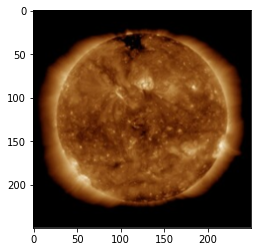

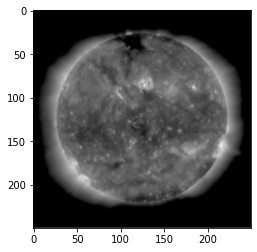

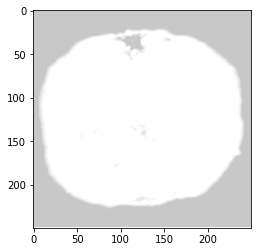

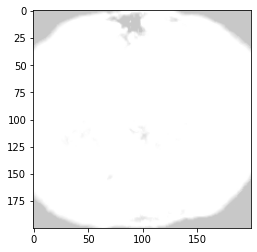

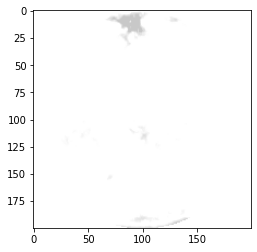

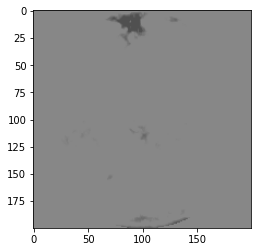

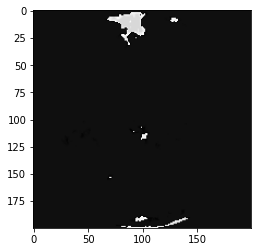


Area: 3237065.55 km^2


In [1]:
import math
import cv2
import numpy as np 
from matplotlib import pyplot as plt

# Original Image
image = cv2.imread('./DATA/01.png')
image = cv2.resize(image , dsize=(250, 250), interpolation=cv2.INTER_AREA)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(image)
plt.show()

# BW Filter
image = cv2.imread('./DATA/01.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image , dsize=(250, 250), interpolation=cv2.INTER_AREA)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(image)
plt.show()

# Filter for finding Features
img = cv2.imread('./DATA/01.png',cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img , dsize=(250, 250), interpolation=cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
M = np.ones(img.shape, dtype = "uint8") * 100
added = cv2.add(img, M)
added = cv2.add(added, M)
imgplot = plt.imshow(added)
plt.show()

# Crop circle for fitting image
a1 = b1 = 125
r = 100
result = added[a1-r:a1+r,b1-r:b1+r]
imgplot = plt.imshow(result)
plt.show()

x = y = 0
r = 100
img = result
img = img[y:y+r*2, x:x+r*2]

mask = np.full((img.shape[0], img.shape[1]), 0, dtype=np.uint8) 
cv2.circle(mask,(r,r), r, (255,255,255),-1)

fg = cv2.bitwise_or(img, img, mask=mask)
mask = cv2.bitwise_not(mask)
background = np.full(img.shape, 255, dtype=np.uint8)
bk = cv2.bitwise_or(background, background, mask=mask)
final = cv2.bitwise_or(fg, bk)

imgplot = plt.imshow(final)
plt.show()

added = final
M = np.ones(added.shape, dtype = "uint8") * 60
added = cv2.subtract(added, M)
added = cv2.subtract(added, M)
imgplot = plt.imshow(added)
plt.show()

# Filter
added = added - 120
imgplot = plt.imshow(added)
plt.show()


# Calculating White Area of Processed Image
b, g, r = cv2.split(added)
wb = b == 255
wg = g == 255
wr = r == 255

white_pixels_if_true = np.bitwise_and(wb, np.bitwise_and(wg, wr))
img_size = r.size
white_pixels_count = np.sum(white_pixels_if_true)
white_area_ratio = white_pixels_count / img_size

# radius of the sun is 696340
area = (696340 * 696340 * white_area_ratio / 100) * 0.5*0.5*math.pi

print()
print('Area:', round(area,2),"km^2")